Machine Learning (ML): This is a subset of Ai that enables systems to automatically learn and improve from experience without being explicitly programmed.  It focuses on developing algorithms that can analysze data, learn from that data, and make predictions or decisions based on what they have learned.

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)
df = california.frame
# df = california.frame
df.shape

(20640, 9)

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


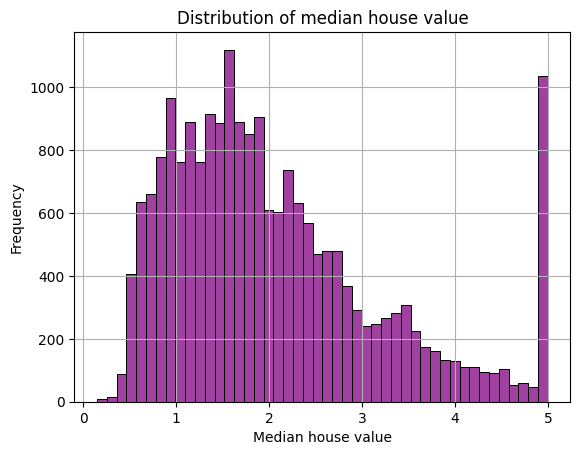

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['MedHouseVal'], color='purple')
plt.title('Distribution of median house value')
plt.xlabel('Median house value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

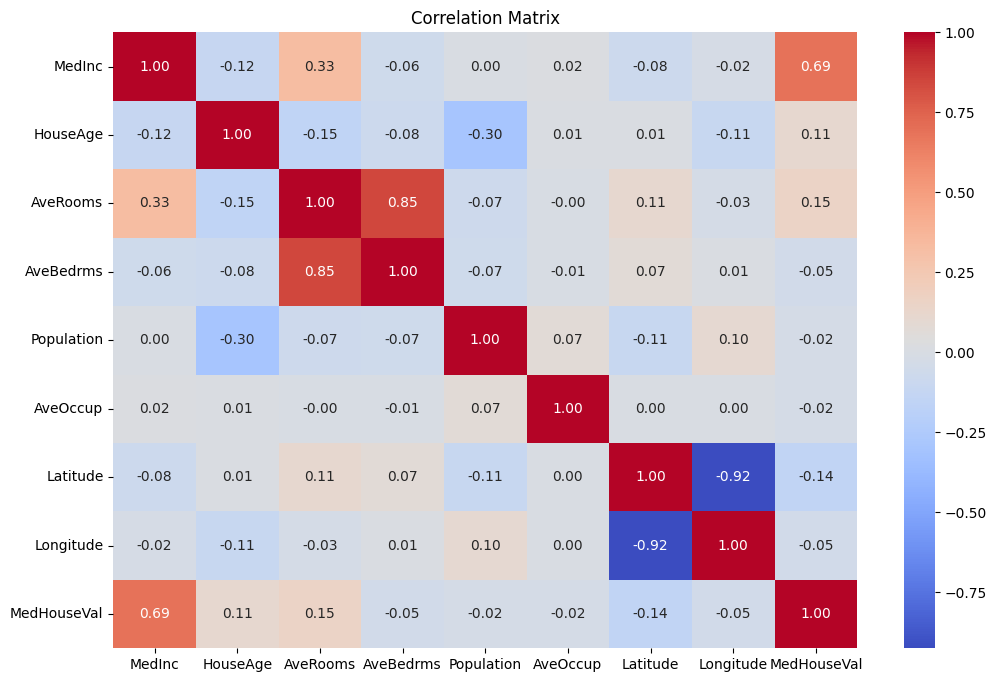

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

FEATURE ENGINEERING

In [14]:
# Calculate the number of households based on population and average occupancy
df['Households'] = df['Population'] / df['AveOccup']

#Average rooms per household to understand the housing density
df['RoomsPerHousehold'] = df['AveRooms'] / df['Households']

# Ratio of bedrooms tototal rooms, which can indicate housing quality
df['BedroomsPerRoom'] = df['AveBedrms'] / df['AveRooms']

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Households,RoomsPerHousehold,BedroomsPerRoom
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,0.055430,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,0.005482,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,177.0,0.046826,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,219.0,0.026563,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,259.0,0.024254,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,330.0,0.015289,0.224625
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,114.0,0.053632,0.215208
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,433.0,0.012022,0.215173
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,349.0,0.015271,0.219892


Outlier Removal: Outliers can change model performance. For this example, we are using Interquartile Range (IQR) method to remove extreme values. This step reduces noise in the dataset

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lr = Q1 - 1.5 * IQR
ur = Q3 + 1.5 * IQR

df_clean = df[~((df < lr) | (df > ur)).any(axis = 1)]

In [16]:
print(f"{df.shape[0] - df_clean.shape[0]} rows removed due to outliers.")

5679 rows removed due to outliers.


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
x = df_clean.drop(columns=['MedHouseVal'])
y = df_clean['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                     random_state=42)
print("Training set shape: ", X_train.shape )
print("Test set shape: ", X_test.shape)

Training set shape:  (11968, 11)
Test set shape:  (2993, 11)


Model Evaluation Function

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def evaluate_model(model, X_test, y_test, name="Model"):

  # Predict on the test set and compute evaluation metrics
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  print(f"--- {name} Evaluation on Test Set ---")
  print(f"MAE: {mae:.4f}")
  print(f"MSE: {mse:.4f}")
  print(f"RMSE: {rmse:.4f}")
  print(f"R² Score: {r2:.4f}")

Hyperparameter Tuning Function
This function uses RandomizedSearchCV to find the best hyperparameters for a given model and then evaluates the best model on the test set.

In [19]:
def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, name,
n_iter=10, cv=5):
  # Perform hyperparameter tuning using RandomizedSearchCV
  random_search = RandomizedSearchCV(
      model, param_grid, n_iter=n_iter, cv=cv, scoring='r2', n_jobs=-1, random_state=42
  )
  random_search.fit(X_train, y_train)
  print(f"Best Parameters (RandomizedSearchCV) for {name}: {random_search.best_params_}")
  print(f"Best R² Score (RandomizedSearchCV) for {name}: {random_search.best_score_}")

  best_model = random_search.best_estimator_
  # Evaluate the best model on the test set
  evaluate_model(best_model, X_test, y_test, name=f"{name} RandomizedSearchCV")
  return best_model

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
evaluate_model(model, X_test, y_test, name='LinearRegression')

--- LinearRegression Evaluation on Test Set ---
MAE: 0.4177
MSE: 0.3009
RMSE: 0.5486
R² Score: 0.6576


Decision Tree Regressor

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42)

# Parameter grid for Decision Tree
# - 'max_depth': Testing depths 5, 10, 20 to balance model complexity and overfitting.
# - 'min_samples_split': Testing 2, 5, 10 to control when to stop splitting nodes.
# - 'min_samples_leaf': Testing 1, 2, 4 to ensure leaves have enough samples for generalization.
param_grid_dt = {
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5, 10]
}
best_dt = tune_and_evaluate_model(
    model_dt, param_grid_dt, X_train, y_train, X_test, y_test, name="Decision Tree", n_iter=20, cv=5
)

Best Parameters (RandomizedSearchCV) for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 15}
Best R² Score (RandomizedSearchCV) for Decision Tree: 0.6634543470046567
--- Decision Tree RandomizedSearchCV Evaluation on Test Set ---
MAE: 0.3739
MSE: 0.2902
RMSE: 0.5387
R² Score: 0.6699


Random Forest Regressor
Random Forest is an ensemble of Decision Trees that reduces overfitting and improves generalization. We’ll tune the number of trees and depth for optimal performance.

In [26]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)

# Parameter grid for Random Forest
# - 'n_estimators': Testing 100 and 150 trees to balance performance and computation time.
# - 'max_depth': Testing 10 and 20 to control tree depth and prevent overfitting.
# - 'min_samples_split': Testing 2 and 5 to manage when to stop splitting.
# - 'min_samples_leaf': Testing 1 and 2 to ensure leaf nodes have sufficient samples.
param_grid_rf = {
    'n_estimators': [80, 100],
    'max_depth': [8, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}
best_rf = tune_and_evaluate_model(
    model_rf, param_grid_rf, X_train, y_train, X_test, y_test, name="Random Forest", n_iter=10, cv=3
)

Best Parameters (RandomizedSearchCV) for Random Forest: {'n_estimators': 80, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 10}
Best R² Score (RandomizedSearchCV) for Random Forest: 0.7618805049743648
--- Random Forest RandomizedSearchCV Evaluation on Test Set ---
MAE: 0.3251
MSE: 0.2127
RMSE: 0.4612
R² Score: 0.7580


XGBoost Regressor
XGBoost is a powerful gradient boosting algorithm known for its speed and performance. It’s particularly effective for structured data like this housing dataset.

In [27]:
# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid for XGBoost
# - 'n_estimators': Testing 100, 200, 300 to find the optimal number of boosting rounds.
# - 'learning_rate': Testing 0.01, 0.05, 0.1 to balance convergence speed and stability.
# - 'max_depth': Testing 3, 5, 7 to control the complexity of individual trees.
# - 'min_child_weight': Testing 1, 3, 5 to prevent overfitting by requiring a minimum sum of instance weights in a child.
# - 'subsample': Testing 0.7, 0.8, 1.0 to control the fraction of samples used for training each tree.
# - 'colsample_bytree': Testing 0.7, 0.8, 1.0 to control the fraction of features used for each tree.
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    # 'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
best_xgb = tune_and_evaluate_model(
    xgb_model, param_grid_xgb, X_train, y_train, X_test, y_test, name="XGBoost", n_iter=10, cv=5
)

Best Parameters (RandomizedSearchCV) for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best R² Score (RandomizedSearchCV) for XGBoost: 0.8398370690486752
--- XGBoost RandomizedSearchCV Evaluation on Test Set ---
MAE: 0.2630
MSE: 0.1398
RMSE: 0.3739
R² Score: 0.8409


In [28]:
xgb_model = xgb.XGBRegressor(
    n_estimators= 300, subsample=1.0, colsample_bytree=0.8,
    learning_rate=0.1, max_depth=5, random_state=42)

xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, name='XGBoost')
print(X_test)
y_pred = xgb_model.predict(X_test)
print("XGBoost Predictions: ", y_pred[:10])


--- XGBoost Evaluation on Test Set ---
MAE: 0.2630
MSE: 0.1398
RMSE: 0.3739
R² Score: 0.8409
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
17573  2.4207      31.0  3.850202   1.121457      1485.0  3.006073     37.32   
7408   2.6179      35.0  2.969008   0.979339      2113.0  4.365702     33.96   
4062   4.5656      20.0  5.147410   1.061089      1334.0  1.771580     34.15   
13616  1.7235      31.0  3.930605   1.131673      1314.0  2.338078     34.12   
16564  4.3229      18.0  5.398601   0.951049       825.0  2.884615     37.75   
...       ...       ...       ...        ...         ...       ...       ...   
157    6.0302      52.0  5.820312   0.929688       634.0  2.476562     37.81   
14383  4.0268      44.0  5.657718   0.956376       712.0  2.389262     32.74   
465    3.8594      52.0  4.962963   1.031746       393.0  2.079365     37.86   
5896   3.4016      23.0  3.576316   1.126316       770.0  2.026316     34.16   
529    4.3098      52.0  5.

In [29]:
data = []
import numpy as np
data = [2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,530.0,0.009915,0.221185]
data_1 = np.array(data)
tempData = pd.DataFrame([data_1], columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'Households', 'RoomsPerHousehold','BedroomsPerRoom'])
tempData
y_pred = xgb_model.predict(tempData)
print("XGBoost Predictions: ", y_pred)

XGBoost Predictions:  [0.9902286]


In [30]:
pip install onnxmltools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement onnxmltools (from versions: none)
ERROR: No matching distribution found for onnxmltools

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install skl2onnx

  Using cached skl2onnx-1.19.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/315.5 kB ? eta -:--:--
   --------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import xgboost as xgb

xgb_model.save_model("xgb_model.json")

In [32]:
loaded_model = xgb.XGBRegressor(
    n_estimators= 300, subsample=1.0, colsample_bytree=0.8,
    learning_rate=0.1, max_depth=5, random_state=42)
# xgb_model = xgb.XGBRegressor()
loaded_model.load_model("xgb_model.json")

# Now use it for prediction
y_pred = xgb_model.predict(X_test)
print("XGBoost Predictions: ", y_pred[:10])

XGBoost Predictions:  [2.1225069  1.4223722  3.824508   0.95152843 1.8458468  0.866773
 0.9987114  3.0457158  0.9970727  1.4801307 ]
